# Project Topic: Enhancing Interpretability and Accuracy in Pneumonia Detection from Chest X-rays Using Attention Mechanisms in Convolutional Neural Networks (CNNs)
Attention mechanisms are inspired by how humans focus on specific parts of visual scenes or text to extract the most relevant information. In deep learning, they enable models to prioritize certain regions of input data over others.
In the context of images, attention mechanisms help the model concentrate on specific regions of the image that are most relevant for making a diagnosis, rather than processing the entire image uniformly.

### Medical Image Diagnosis
This refers to using computer algorithms, particularly deep learning, to identify and classify diseases based on medical images, such as X-rays, CT scans, or MRIs.
The goal is to assist radiologists in identifying patterns or anomalies that may indicate diseases.
### Focus on Pneumonia Detection
Pneumonia is a lung infection that shows specific patterns in chest X-ray images, such as areas of increased opacity due to fluid or inflammation.
Detecting pneumonia through X-rays is a standard practice, but it can be challenging because the visual patterns can be subtle or resemble other conditions.
Using deep learning with attention mechanisms can improve the accuracy and efficiency of detecting these patterns.
### Relevance of Attention Mechanisms in Pneumonia Detection
Why attention mechanisms?
Chest X-rays often contain irrelevant regions, like the bones or background, which do not contribute to the diagnosis.
Attention mechanisms help the model focus on the lungs or specific areas with abnormalities while ignoring irrelevant parts.
This can enhance the interpretability of the model, allowing it to "highlight" the regions it deems important for its prediction.

# Load Libraries required
    This will include libraries like:
    Numpy, Pandas, seaborn and Matplotlib for analysis and visualization,
    Pytorch for building deep learning models, 
    opencv for image processing and
    scikit-learn for evaluation.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [4]:
import pandas as pd

# Load the uploaded files
bbox_file_path = 'Pneumonia Data\\BBox_List_2017.csv'
data_entry_file_path = 'Pneumonia Data\\Data_Entry_2017.csv'

# Read the files
bbox_data = pd.read_csv(bbox_file_path)
data_entry_data = pd.read_csv(data_entry_file_path)

# Data Exploration

In [7]:
bbox_data.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


BBox_List_2017.csv: Contains bounding box annotations for certain findings in images.
    
    Columns:
        Image Index: Filename of the X-ray image.
        Finding Label: Indicates the condition (e.g., Atelectasis).
        Bounding box details: Bbox [x], y, w, h] (coordinates and dimensions of the region of interest).
        Other columns (Unnamed) are empty.

In [10]:
data_entry_data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


Data_Entry_2017.csv: Provides metadata and labels for a larger dataset.

    Columns:
        Image Index: Filename of the X-ray image.
        Finding Labels: List of conditions in the image (e.g., Cardiomegaly, No Finding).
        Patient information: Patient Age, Patient Gender, View Position.
        Image properties: OriginalImage[Width], Height], and pixel spacing.


In [13]:
# Check for the general structure of the dataset
bbox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB


In [15]:
# Check for the general structure of the dataset
data_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


# Missing data
Let's check missing information in the two datasets.

In [18]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return np.transpose(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']))

In [20]:
bbox_data.drop(["Unnamed: 6", "Unnamed: 7", "Unnamed: 8"], inplace=True, axis=1)
missing_data(bbox_data)

,Image Index,Finding Label,Bbox [x,y,w,h]
Total,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data_entry_data.drop(["Unnamed: 11"], inplace=True, axis=1)
missing_data(data_entry_data)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


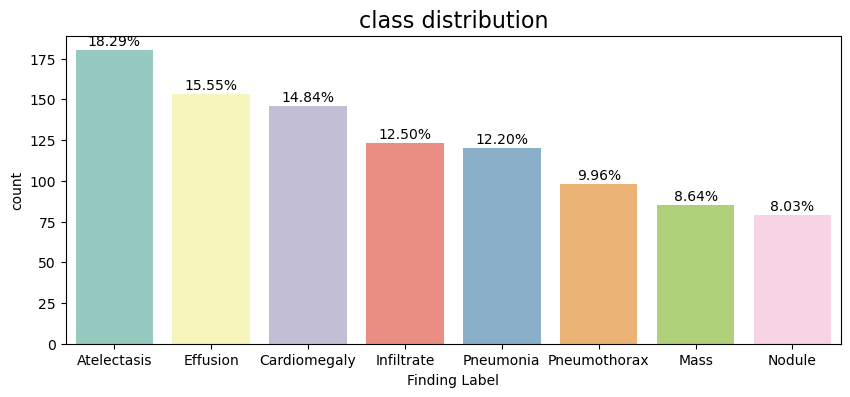

In [24]:
# Let's check the class distribution from class detailed info.
f, ax = plt.subplots(1,1, figsize=(10,4))
total = float(len(bbox_data))
sns.countplot(x=bbox_data['Finding Label'], order=bbox_data['Finding Label'].value_counts().index, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.title('class distribution', fontsize=16)
plt.show()

# Data Analysis and Visualization

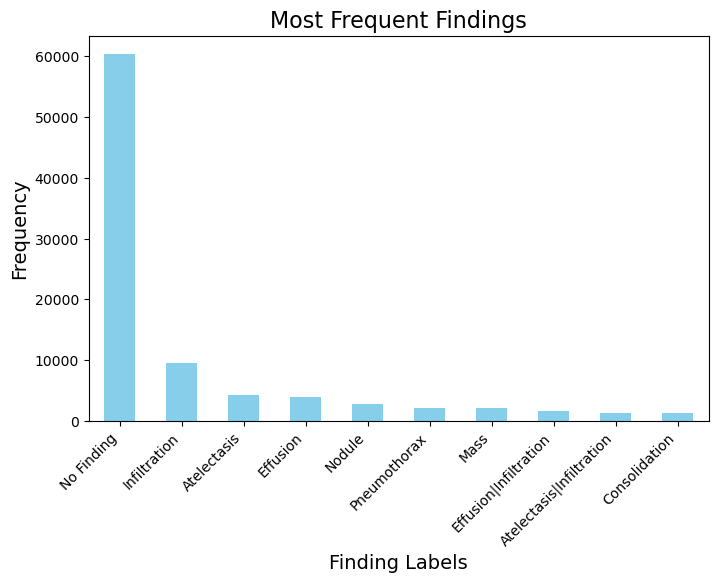

In [27]:
import matplotlib.pyplot as plt

# Distribution of findings in Data_Entry_2017.csv
finding_labels_distribution = data_entry_data['Finding Labels'].value_counts()

# Plot the distribution of findings
plt.figure(figsize=(8, 5))
finding_labels_distribution.head(10).plot(kind='bar', color='skyblue')
plt.title('Most Frequent Findings', fontsize=16)
plt.xlabel('Finding Labels', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


In [29]:
# Count images with bounding boxes for pneumonia-related findings in BBox_List_2017.csv
pneumonia_bbox_count = bbox_data[bbox_data['Finding Label'].str.contains('Pneumonia', case=False)].shape[0]
# Display key insights
print(finding_labels_distribution.head(10)) 
print(pneumonia_bbox_count)

Finding Labels
No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Name: count, dtype: int64
120


## Key Insights:

Most Frequent Findings:

    The most common label is "No Finding," with 60,361 occurrences.
    Other frequent findings include Infiltration, Atelectasis, and Effusion.
    Pneumonia is less common but still present in some records.
    
Bounding Boxes for Pneumonia:

    There are 120 images with bounding box annotations specifically for pneumonia.

# Exploring and Analyse the image samples

In [33]:
# Attempting to extract and navigate the described file structure
file_path = 'Pneumonia Data\\image file'
image_files = []
extracted_files = os.listdir(file_path)
for img_folder in extracted_files:
    image_files.append(os.path.join(file_path, img_folder))

print(len(image_files))
image_files[:5]

112120


['Pneumonia Data\\image file\\00000001_000.png',
 'Pneumonia Data\\image file\\00000001_001.png',
 'Pneumonia Data\\image file\\00000001_002.png',
 'Pneumonia Data\\image file\\00000002_000.png',
 'Pneumonia Data\\image file\\00000003_000.png']

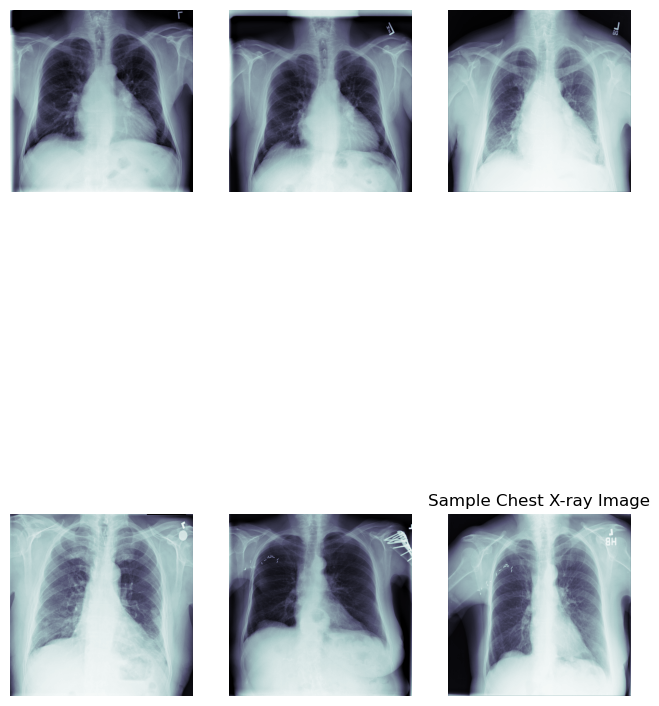

In [35]:
from PIL import Image

# Open and display the image
f, ax = plt.subplots(2,3, figsize=(8,12))
plt.axis("off")
for i, img in enumerate(image_files[0:6]):
    sample_image = Image.open(img)
    # Display the image
    ax[i//3, i%3].imshow(sample_image, cmap=plt.cm.bone) 
    ax[i//3, i%3].axis('off')
plt.title("Sample Chest X-ray Image")
plt.show()


# Detect Region of Pneumonia 
Bounding Box Annotation: Use bounding box coordinates from the dataset to highlight areas of suspected pneumonia for the first six images with pnemonia.

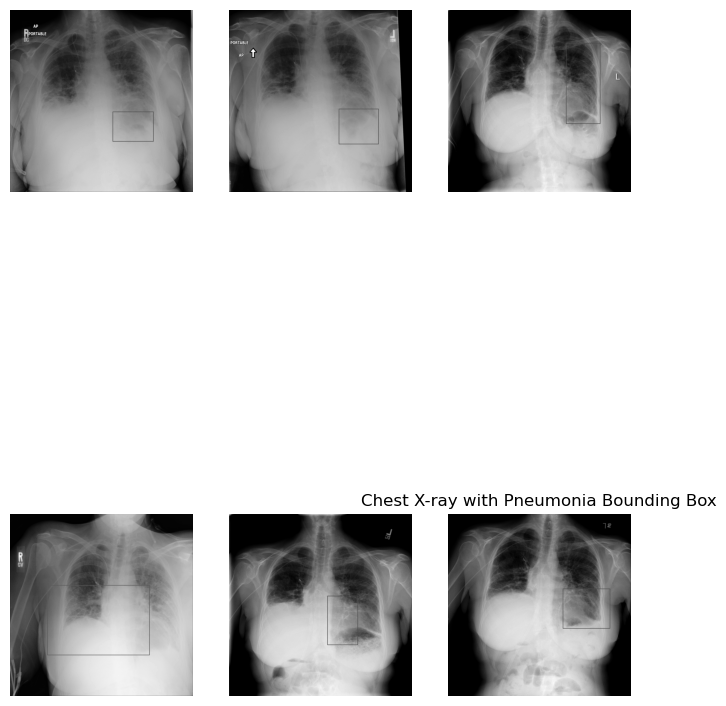

In [38]:
from PIL import ImageDraw
# Filter for a specific image and condition (e.g., pneumonia)
pneumonia_bbox = bbox_data[bbox_data["Finding Label"].str.contains("Pneumonia", case=False)]
# Display the image with the bounding box
f, ax = plt.subplots(2,3, figsize=(8,12))
for i in range(6):
    # Example: Get the bounding box for the first pneumonia case. Format: [x_min, y_min, x_max, y_max]
    bbox = pneumonia_bbox.iloc[i]
    bounding_box = [bbox["Bbox [x"], bbox["y"], bbox["Bbox [x"] + bbox["w"], bbox["y"] + bbox["h]"]]
    # Load an image
    image = Image.open(image_files[pneumonia_bbox.index[i]])
    # Annotate the Image with Bounding Box
    draw = ImageDraw.Draw(image)
    draw.rectangle(bounding_box, outline="red", width=3)
    # Display the image
    ax[i//3, i%3].imshow(image, cmap="gray") 
    ax[i//3, i%3].axis('off')
plt.title("Chest X-ray with Pneumonia Bounding Box")
plt.axis("off")
plt.show()


# Data Preprocessing

Preprocess Images

    Resize images to a consistent size (e.g., 224×224 for models like ResNet).
    Normalize pixel values (scale to [0, 1] or [-1, 1]).
    Augment data with transformations like rotations, flips, or brightness adjustments for better generalization.

Annotations and Labels

    Load bounding boxes for pneumonia regions if available.
    For classification (e.g., pneumonia vs. no pneumonia), ensure the labels are correctly assigned.
    Other conditions are labeled as non pneumonia

In [41]:
import shutil
from sklearn.model_selection import train_test_split
import random

# Paths
base_dir = "Pneumonia Data"
bbox_csv = os.path.join(base_dir, "BBox_List_2017.csv")  # Bounding box CSV file
images_dir = os.path.join(base_dir, "image file")  # Folder containing all images

# Load bounding box data
bbox_data = pd.read_csv(bbox_csv)
# Correct any condition labeled as Pneumothorax to Pneumonia
bbox_data['Finding Label'] = bbox_data['Finding Label'].str.replace("Pneumothorax", "Pneumonia")
# Add a "Condition" column to classify images as Pneumonia or Other
bbox_data['Condition'] = bbox_data['Finding Label'].apply(lambda x: 'Pneumonia' if 'Pneumonia' in x else 'Other')

# Get unique images for each condition
pneumonia_images = bbox_data[bbox_data['Condition'] == 'Pneumonia']['Image Index'].unique()
other_images = bbox_data[bbox_data['Condition'] == 'Other']['Image Index'].unique()
print(pneumonia_images.size)
# other_images = other_images[:216]
print(other_images.size)

# Split the dataset into train, validation, and test sets
train_pneumonia, test_pneumonia = train_test_split(pneumonia_images, test_size=0.2, random_state=42)
val_pneumonia, test_pneumonia = train_test_split(test_pneumonia, test_size=0.5, random_state=42)

train_other, test_other = train_test_split(other_images, test_size=0.2, random_state=42)
val_other, test_other = train_test_split(test_other, test_size=0.5, random_state=42)

# Combine Pneumonia and Other for each split
train_paths = [(os.path.join(images_dir, img), "Pneumonia") for img in train_pneumonia] + \
              [(os.path.join(images_dir, img), "Other") for img in train_other]

val_paths = [(os.path.join(images_dir, img), "Pneumonia") for img in val_pneumonia] + \
            [(os.path.join(images_dir, img), "Other") for img in val_other]

test_paths = [(os.path.join(images_dir, img), "Pneumonia") for img in test_pneumonia] + \
             [(os.path.join(images_dir, img), "Other") for img in test_other]

# Shuffle the data for each split
random.shuffle(train_paths)
random.shuffle(val_paths)
random.shuffle(test_paths)

print(f"Train samples: {len(train_paths)}, Validation samples: {len(val_paths)}, Test samples: {len(test_paths)}")

216
696
Train samples: 728, Validation samples: 92, Test samples: 92


# Data Argumentation

In [44]:
from torchvision import transforms
from torch.utils.data import Dataset

# Define a custom dataset class
class PneumoniaDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path, label = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = 1 if label == "Pneumonia" else 0  # Convert label to binary: 1 for Pneumonia, 0 for Other
        return image, label

# Data Augmentation and Preprocessing
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets and dataloaders
train_dataset = PneumoniaDataset(train_paths, transform=train_transform)
val_dataset = PneumoniaDataset(val_paths, transform=test_transform)
test_dataset = PneumoniaDataset(test_paths, transform=test_transform)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Correct class imbalance
    The class distribution before upsampling: Pneumonia=172, Other=556
    So we need to:
    Separate the Pneumonia and Other class samples.
    Randomly duplicate the Pneumonia samples until their count matches the Other class samples.
    Create a new training DataLoader with the upsampled dataset.

In [47]:
from collections import Counter
import random

def upsample_classes(data_paths):
    # Separate data paths by class
    pneumonia_paths = [path for path, label in data_paths if label == "Pneumonia"]
    other_paths = [path for path, label in data_paths if label == "Other"]

    print(f"Class distribution before upsampling: Pneumonia={len(pneumonia_paths)}, Other={len(other_paths)}")

    # Upsample Pneumonia to match Other
    upsampled_pneumonia_paths = random.choices(pneumonia_paths, k=len(other_paths))

    # Combine both classes
    balanced_data_paths = [(path, "Pneumonia") for path in upsampled_pneumonia_paths] + \
                          [(path, "Other") for path in other_paths]

    # Shuffle the dataset
    random.shuffle(balanced_data_paths)

    print(f"Class distribution after upsampling: {Counter(label for _, label in balanced_data_paths)}")
    return balanced_data_paths

# Perform upsampling on train data
balanced_train_paths = upsample_classes(train_paths)

# Create the balanced training dataset
balanced_train_dataset = PneumoniaDataset(balanced_train_paths, transform=train_transform)

# Create the DataLoader
train_loader_balanced = DataLoader(balanced_train_dataset, batch_size=32, shuffle=True)

# Validation and test loaders remain unchanged


Class distribution before upsampling: Pneumonia=172, Other=556
Class distribution after upsampling: Counter({'Pneumonia': 556, 'Other': 556})


# Data Modelling with Optimization

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

class EarlyStopping:
    """
    Early stopping to stop training when validation loss doesn't improve after a given patience.
    """
    def __init__(self, patience=2, verbose=False, delta=0, path='checkpoint.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f"Validation loss decreased. Saving model...")
        torch.save(model.state_dict(), self.path)


# Load Pre-trained ResNet50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Load a pre-trained ResNet50 model
resnet50 = models.resnet50(weights="ResNet50_Weights.DEFAULT")

# Modify the final fully connected layer to match our binary classification task (Pneumonia vs Other)
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 1)  # Binary classification (output: 1 neuron)
resnet50 = resnet50.to(device)

# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary classification
optimizer = optim.Adam(resnet50.parameters(), lr=1e-4)


# Train loop with early stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=5):
    
    early_stopping = EarlyStopping(patience=patience, verbose=True, path="best_model.pth")
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
    
            # Forward pass
            outputs = model(images)
            outputs = outputs.squeeze(1)  # Ensure outputs are of shape (batch_size,)
            loss = criterion(outputs, labels.float())  # Convert labels to float for BCEWithLogitsLoss
    
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")
        
        # Validation Phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader):
                images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                preds = torch.sigmoid(outputs) > 0.5
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_accuracy = 100 * correct / total
        val_loss_avg = val_loss / len(val_loader)
        print(f"Val Loss: {val_loss_avg:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Check early stopping
        early_stopping(val_loss_avg, model)

        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    # Load the best model
    print("Loading the best model...")
    model.load_state_dict(torch.load("best_model.pth", weights_only=True))
    return model


# Train the model with early stopping
trained_model = train_model_with_early_stopping(
    resnet50, train_loader_balanced, val_loader, criterion, optimizer, num_epochs=20, patience=7
)


cuda
Epoch [1/20], Loss: 0.6906


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.38s/it]


Val Loss: 0.7547, Val Accuracy: 25.00%
Validation loss decreased. Saving model...
Epoch [2/20], Loss: 0.6741


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]


Val Loss: 0.6349, Val Accuracy: 68.48%
Validation loss decreased. Saving model...
Epoch [3/20], Loss: 0.6468


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.6670, Val Accuracy: 60.87%
EarlyStopping counter: 1 out of 8
Epoch [4/20], Loss: 0.6102


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.32s/it]


Val Loss: 0.6480, Val Accuracy: 61.96%
EarlyStopping counter: 2 out of 8
Epoch [5/20], Loss: 0.5936


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.45s/it]


Val Loss: 0.6802, Val Accuracy: 58.70%
EarlyStopping counter: 3 out of 8
Epoch [6/20], Loss: 0.5477


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.31s/it]


Val Loss: 0.9270, Val Accuracy: 54.35%
EarlyStopping counter: 4 out of 8
Epoch [7/20], Loss: 0.5336


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.7622, Val Accuracy: 56.52%
EarlyStopping counter: 5 out of 8
Epoch [8/20], Loss: 0.5001


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.8869, Val Accuracy: 58.70%
EarlyStopping counter: 6 out of 8
Epoch [9/20], Loss: 0.4704


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.29s/it]


Val Loss: 0.6268, Val Accuracy: 71.74%
Validation loss decreased. Saving model...
Epoch [10/20], Loss: 0.5005


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.6309, Val Accuracy: 72.83%
EarlyStopping counter: 1 out of 8
Epoch [11/20], Loss: 0.4769


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.35s/it]


Val Loss: 0.6404, Val Accuracy: 67.39%
EarlyStopping counter: 2 out of 8
Epoch [12/20], Loss: 0.4327


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.6795, Val Accuracy: 67.39%
EarlyStopping counter: 3 out of 8
Epoch [13/20], Loss: 0.4008


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.26s/it]


Val Loss: 0.7530, Val Accuracy: 71.74%
EarlyStopping counter: 4 out of 8
Epoch [14/20], Loss: 0.3820


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 0.8995, Val Accuracy: 59.78%
EarlyStopping counter: 5 out of 8
Epoch [15/20], Loss: 0.3977


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.34s/it]


Val Loss: 0.7741, Val Accuracy: 68.48%
EarlyStopping counter: 6 out of 8
Epoch [16/20], Loss: 0.3607


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.30s/it]


Val Loss: 1.0209, Val Accuracy: 69.57%
EarlyStopping counter: 7 out of 8
Epoch [17/20], Loss: 0.3460


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.29s/it]

Val Loss: 1.0105, Val Accuracy: 69.57%
EarlyStopping counter: 8 out of 8
Early stopping triggered!
Loading the best model...


# Save the Trained Model

In [52]:
# Save the Trained Model
def save_model(model, path="resnet50_pneumonia.pth"):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

# Save the trained model
save_model(trained_model)

Model saved to resnet50_pneumonia.pth


## Load the Saved Trained Model

In [ ]:
# Define the model architecture (ResNet50 in this case)
model = models.resnet50(pretrained=False)  # Initialize a new ResNet50
num_classes = 2  # Binary classification: Pneumonia vs Other
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)  # Update the final layer

# Load the saved model weights
model.load_state_dict(torch.load("resnet50_pneumonia.pth"))

# Set the model to evaluation mode
model.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Testing the Model

In [88]:
# Testing the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy

# Test the trained model
test_accuracy = test_model(trained_model, test_loader)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.19s/it]

Test Accuracy: 72.83%


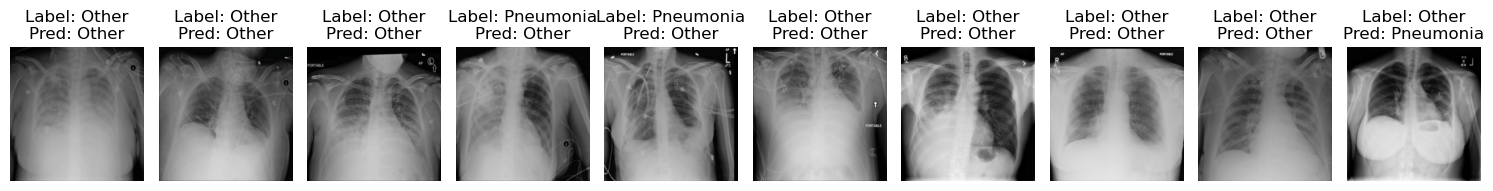

In [90]:
# Visualize Predictions
def visualize_predictions(model, test_loader, num_images=10):
    model.eval()
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    axes = axes.flatten()

    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()
            
            for j in range(min(num_images, len(images))):
                image = images[j].cpu().permute(1, 2, 0).numpy()
                image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Un-normalize
                image = np.clip(image, 0, 1)
                
                label = "Pneumonia" if labels[j].item() == 1 else "Other"
                pred = "Pneumonia" if preds[j][0] else "Other"
                
                axes[j].imshow(image)
                axes[j].set_title(f"Label: {label}\nPred: {pred}")
                axes[j].axis("off")
            
            plt.tight_layout()
            plt.show()
            return

# Visualize a few test predictions
visualize_predictions(trained_model, test_loader)


# Evaluation on the Test Set
We'll use sklearn to compute metrics.

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]

Classification Report:
              precision    recall  f1-score   support

       Other       0.82      0.83      0.82        70
   Pneumonia       0.43      0.41      0.42        22

    accuracy                           0.73        92
   macro avg       0.62      0.62      0.62        92
weighted avg       0.72      0.73      0.73        92



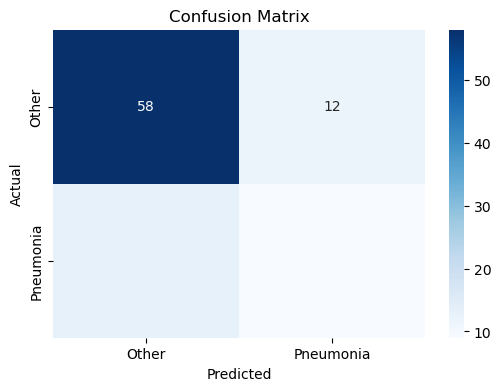

Confusion matrix values
[[58 12]
 [13  9]]


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set and compute metrics
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images = images.to(device)
            labels = labels.numpy()

            outputs = model(images)
            preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()

            y_true.extend(labels)
            y_pred.extend(preds)

    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Compute metrics
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Other", "Pneumonia"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Other", "Pneumonia"], yticklabels=["Other", "Pneumonia"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    print("Confusion matrix values")
    print(cm)
# Evaluate the best-trained model
evaluate_model(trained_model, test_loader)


## Creating Grad-CAM (Gradient-weighted Class Activation Mapping) Heatmap
generates a heatmap to visualize which parts of an image the model focuses on when making predictions. 
Let’s implement Grad-CAM for the pneumonia detection model. Below is the code for generating Grad-CAM visualizations:

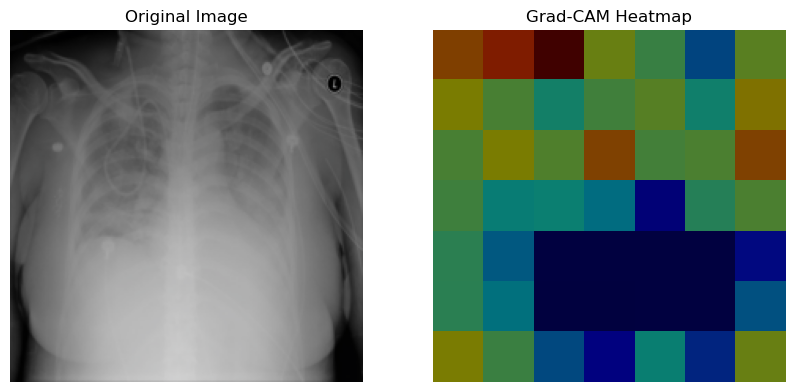

In [70]:

# Function to compute Grad-CAM heatmap
def generate_gradcam(model, image, target_layer, target_class):
    model.eval()
    image = image.unsqueeze(0).to(device)

    # Hook to capture activations
    features = {}
    gradients = {}

    def forward_hook(module, input, output):
        features["activations"] = output

    def full_backward_hook(module, grad_in, grad_out):
        gradients["gradients"] = grad_out[0]

    # Register hooks
    handle_forward = target_layer.register_forward_hook(forward_hook)
    handle_backward = target_layer.register_full_backward_hook(full_backward_hook)

    # Forward pass
    outputs = model(image)

    # Backward pass for the target class
    model.zero_grad()
    if outputs.shape[1] == 1:  # Binary classification
        outputs.backward(gradient=torch.ones_like(outputs))
    else:
        target = torch.zeros_like(outputs)
        target[0, target_class] = 1
        outputs.backward(gradient=target)

    # Remove any existing hooks before registering the full backward hook 
    for hook in model._backward_hooks.values(): 
        hook.remove()
    # Remove hooks
    handle_forward.remove()
    handle_backward.remove()

    # Extract gradients and activations
    activations = features["activations"].detach()  # Shape: [batch_size, num_channels, height, width]
    gradients = gradients["gradients"].detach()  # Shape: [batch_size, num_channels, height, width]

    # Compute weights
    weights = torch.mean(gradients, dim=(2, 3))  # Shape: [batch_size, num_channels]

    # Reshape weights for broadcasting
    weights = weights.unsqueeze(-1).unsqueeze(-1)  # Shape: [batch_size, num_channels, 1, 1]

    # Compute Grad-CAM
    gradcam = torch.sum(weights * activations, dim=1).squeeze(0).cpu().numpy()  # Shape: [height, width]

    # Normalize heatmap
    gradcam = np.maximum(gradcam, 0)  # Apply ReLU
    gradcam /= gradcam.max()  # Normalize
    return gradcam

# Extract one image from test_loader
for images, labels in test_loader:
    image = images[0].to(device)  # Select first image and move to GPU
    label = labels[0].item()  # Corresponding label
    break  # Exit after first batch

# Generate Grad-CAM Heatmap
target_class = 1  # Target class (Pneumonia)
target_layer = trained_model.layer4[2].conv3  # Example: Last convolutional layer of ResNet50
gradcam_heatmap = generate_gradcam(trained_model, image, target_layer, target_class)

# Visualize Grad-CAM
def visualize_gradcam(image, gradcam):
    # Denormalize the image
    image = image.cpu().squeeze().permute(1, 2, 0).numpy()  # Convert to HWC format
    image = np.clip(image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)  # Denormalize

    # Plot original image and Grad-CAM heatmap
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(gradcam, cmap="jet", alpha=0.5) 
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")
    plt.show()

# Visualize the result
visualize_gradcam(image, gradcam_heatmap)


## Key Metrics Analysis

#### 1. Performance for "Other" Class

    * Precision (0.82): Out of all instances predicted as "Other," 82% were correct. This shows the model is good at identifying non-pneumonia cases without much misclassification.
    * Recall (0.83): The model correctly identifies 83% of all true "Other" instances. While decent, this indicates that some non-pneumonia cases are being classified as "Pneumonia."
    * F1-Score (0.82): The harmonic mean of precision and recall is strong, confirming the model's robustness for the "Other" class.
#### 2. Performance for "Pneumonia" Class

    * Precision (0.43): Out of all instances predicted as "Pneumonia," only 43% were correct. This indicates the model struggles with false positives for pneumonia.
    * Recall (0.41): The model identifies 41% of true pneumonia cases, showing moderate sensitivity but leaving a significant number of pneumonia cases undetected.
    * F1-Score (0.42): The low F1-score suggests the model's overall performance for "Pneumonia" is suboptimal, with substantial room for improvement.

## Conclusions
#### Class Imbalance Still an Issue:

Despite efforts to address class imbalance (e.g., upsampling/downsampling), the model's recall and precision for "Pneumonia" remain low compared to "Other." This is likely because the "Pneumonia" class has fewer examples or less distinctive features compared to the "Other" class.

#### Good Generalization for "Other":

The model performs well at identifying non-pneumonia cases, which suggests it has learned generalized features for "Other" but struggles with specific features indicative of pneumonia.

#### Potential Overfitting to "Other":

The high precision for "Other" combined with low recall for "Pneumonia" suggests the model might be biased toward predicting "Other," which is more common in the dataset.


# Inference on New Images
We’ll create a pipeline to load new images, preprocess them, and make predictions.

In [34]:
def predict_image(model, image_path):
    # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Perform inference
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        prediction = torch.sigmoid(output).item() > 0.5

    return "Pneumonia" if prediction else "Other"

# Example usage: Predicting on a new image
image_path = image_files[131]
prediction = predict_image(trained_model, image_path)
print(f"Prediction for {image_path}: {prediction}")
